### Stock Market Prediction And Forecasting Using Stacked LSTM

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from math import ceil
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor

In [4]:
import pandas as pd

In [8]:
df=pd.read_csv('AAPL_data.csv')

In [9]:
data=df

In [10]:
print(data)

             Date   Adj Close       Close        High         Low        Open  \
0      12-12-1980    0.098834    0.128348    0.128906    0.128348    0.128348   
1      15-12-1980    0.093678    0.121652    0.122210    0.121652    0.122210   
2      16-12-1980    0.086802    0.112723    0.113281    0.112723    0.113281   
3      17-12-1980    0.088951    0.115513    0.116071    0.115513    0.115513   
4      18-12-1980    0.091530    0.118862    0.119420    0.118862    0.118862   
...           ...         ...         ...         ...         ...         ...   
11079  22-11-2024  229.869995  229.869995  230.720001  228.059998  228.059998   
11080  25-11-2024  232.869995  232.869995  233.250000  229.740005  231.460007   
11081  26-11-2024  235.059998  235.059998  235.570007  233.330002  233.330002   
11082  27-11-2024  234.929993  234.929993  235.690002  233.809998  234.470001   
11083  29-11-2024  237.330002  237.330002  237.809998  233.970001  234.809998   

          Volume  
0      4

Text(0.5, 1.0, 'Stock Price of Apple over the Years')

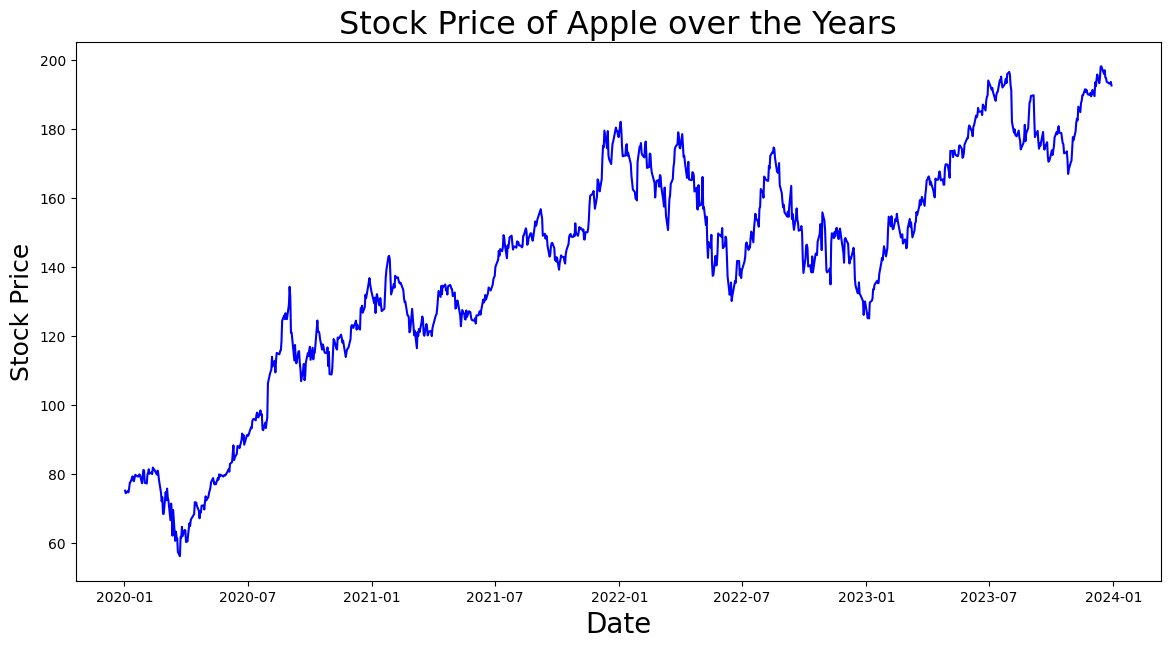

In [53]:
data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
data.index = data['Date']
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price history',color='b')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=18)
plt.title('Stock Price of Apple over the Years',size=23)

C:\Users\ramsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


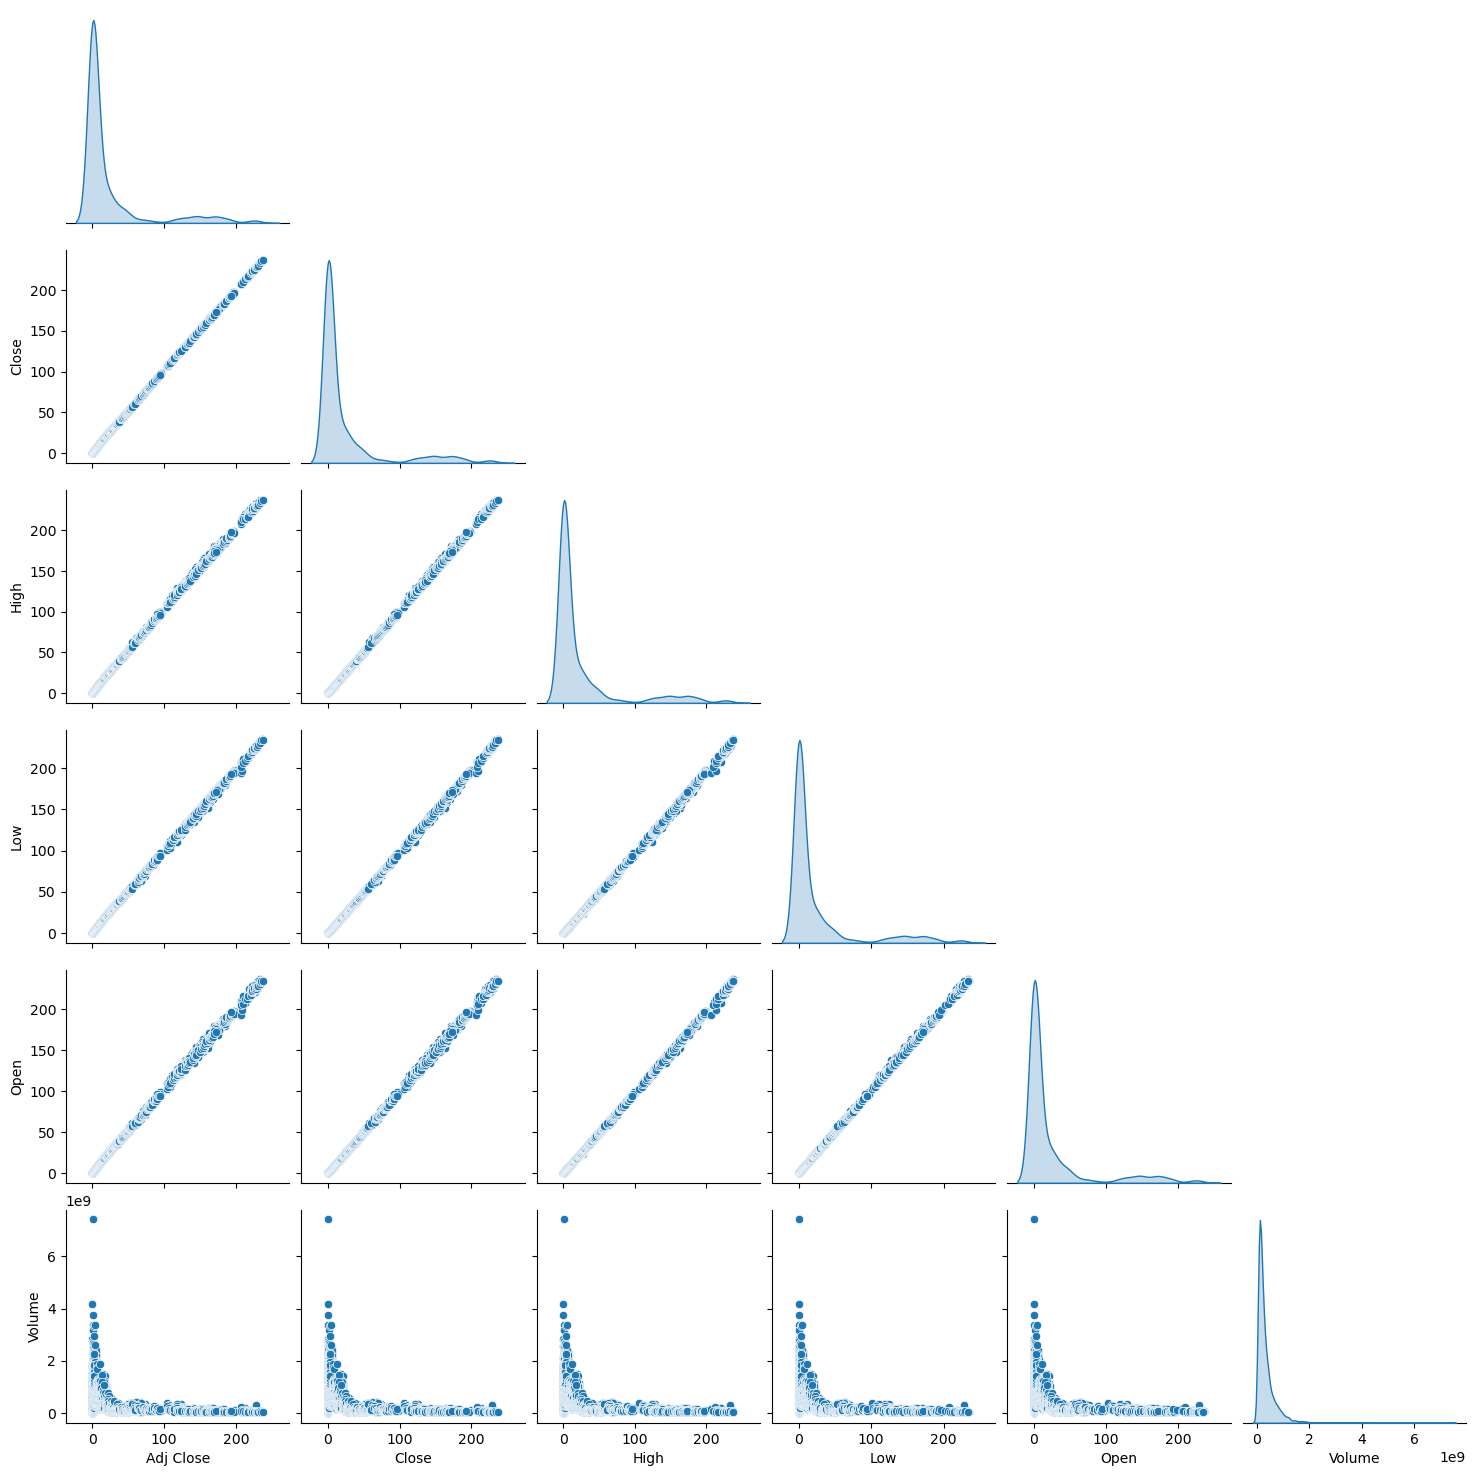

In [13]:
# Plot pairplot

import seaborn as sns 

sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()


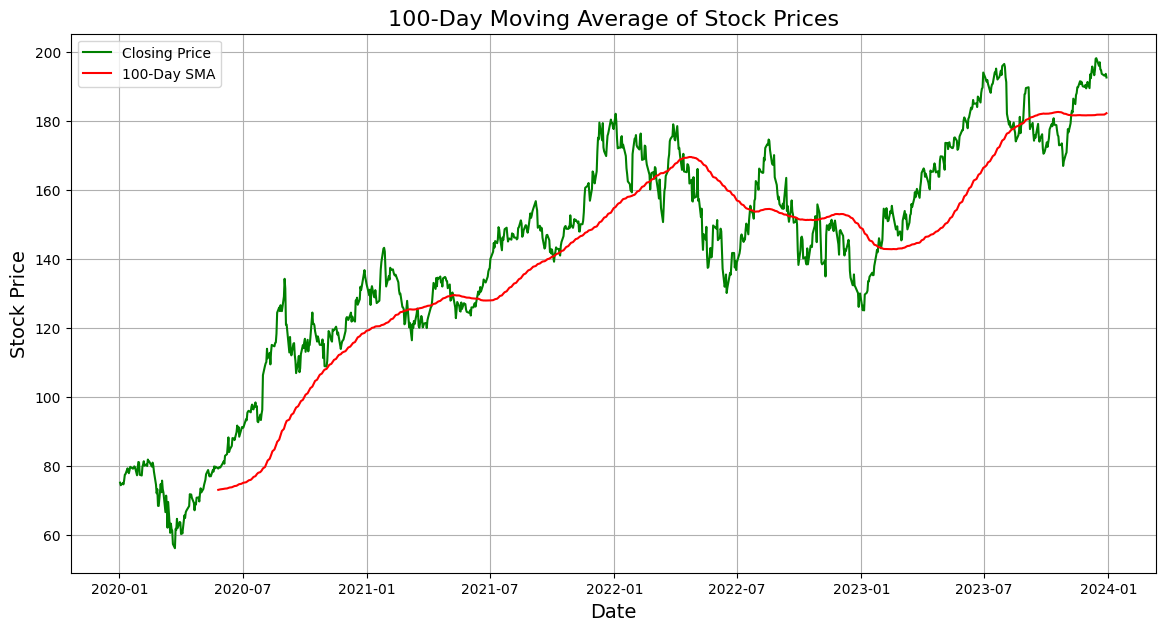

In [54]:
#  Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Calculate the moving average with a window of 100 days
window_size = 100
data['SMA'] = data['Close'].rolling(window=window_size).mean()

# Plotting the Closing Prices and Moving Average
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='green')
plt.plot(data['Date'], data['SMA'], label=f'{window_size}-Day SMA', color='red')
plt.xlabel('Date', size=14)
plt.ylabel('Stock Price', size=14)
plt.title(f'{window_size}-Day Moving Average of Stock Prices', size=16)
plt.legend()
plt.grid(True)
plt.show()

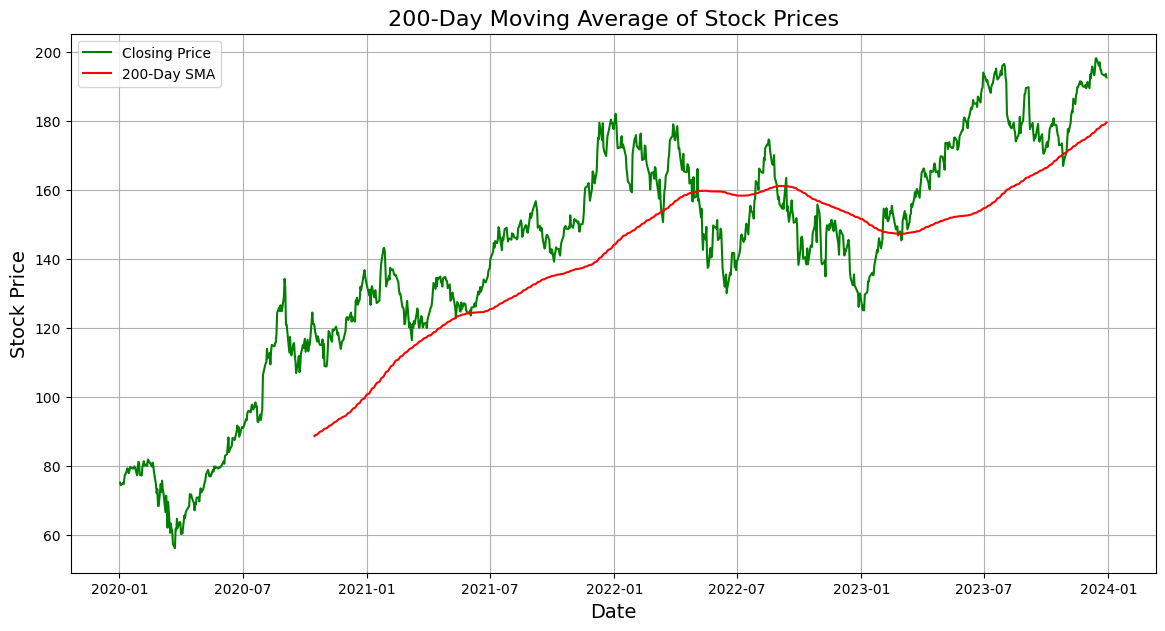

In [56]:
#  Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Calculate the moving average with a window of 200 days
window_size = 200
data['SMA2'] = data['Close'].rolling(window=window_size).mean()

# Plotting the Closing Prices and Moving Average
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='green')
plt.plot(data['Date'], data['SMA2'], label=f'{window_size}-Day SMA', color='red')
plt.xlabel('Date', size=14)
plt.ylabel('Stock Price', size=14)
plt.title(f'{window_size}-Day Moving Average of Stock Prices', size=16)
plt.legend()
plt.grid(True)
plt.show()

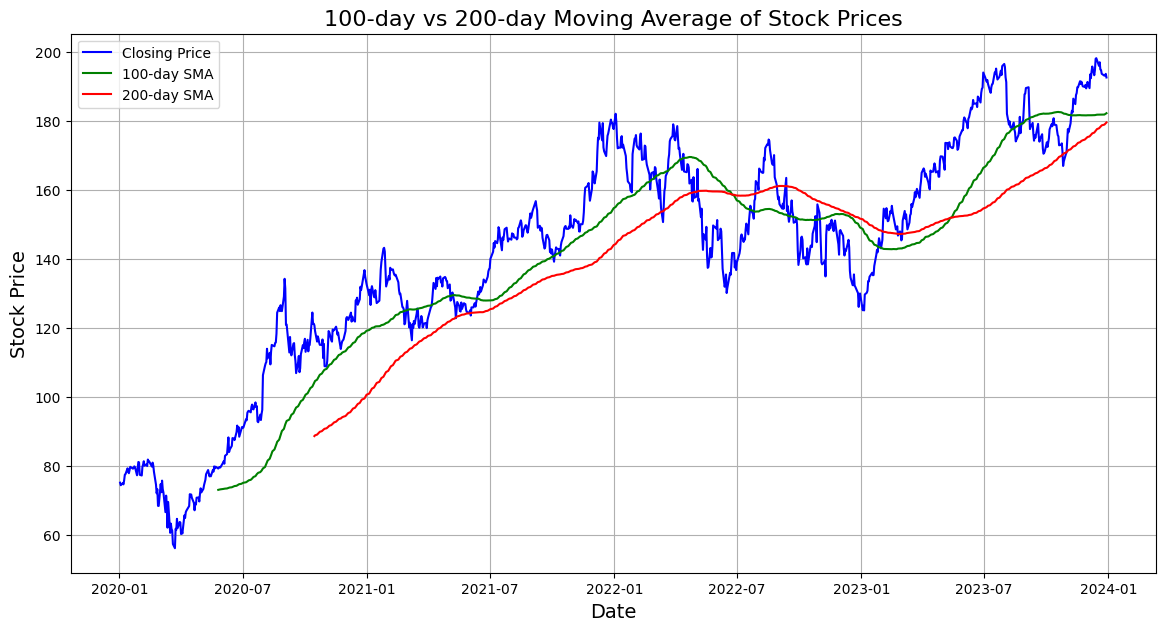

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the stock data with a 'Close' column

# Calculate 100-day SMA
data['SMA'] = data['Close'].rolling(window=100).mean()

# Calculate 200-day SMA
data['SMA2'] = data['Close'].rolling(window=200).mean()

# Plot the closing prices, 100-day SMA, and 200-day SMA
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['SMA'], label='100-day SMA', color='green')
plt.plot(data['SMA2'], label='200-day SMA', color='red')
plt.xlabel('Date', size=14)
plt.ylabel('Stock Price', size=14)
plt.title('100-day vs 200-day Moving Average of Stock Prices', size=16)
plt.legend()
plt.grid(True)
plt.show()

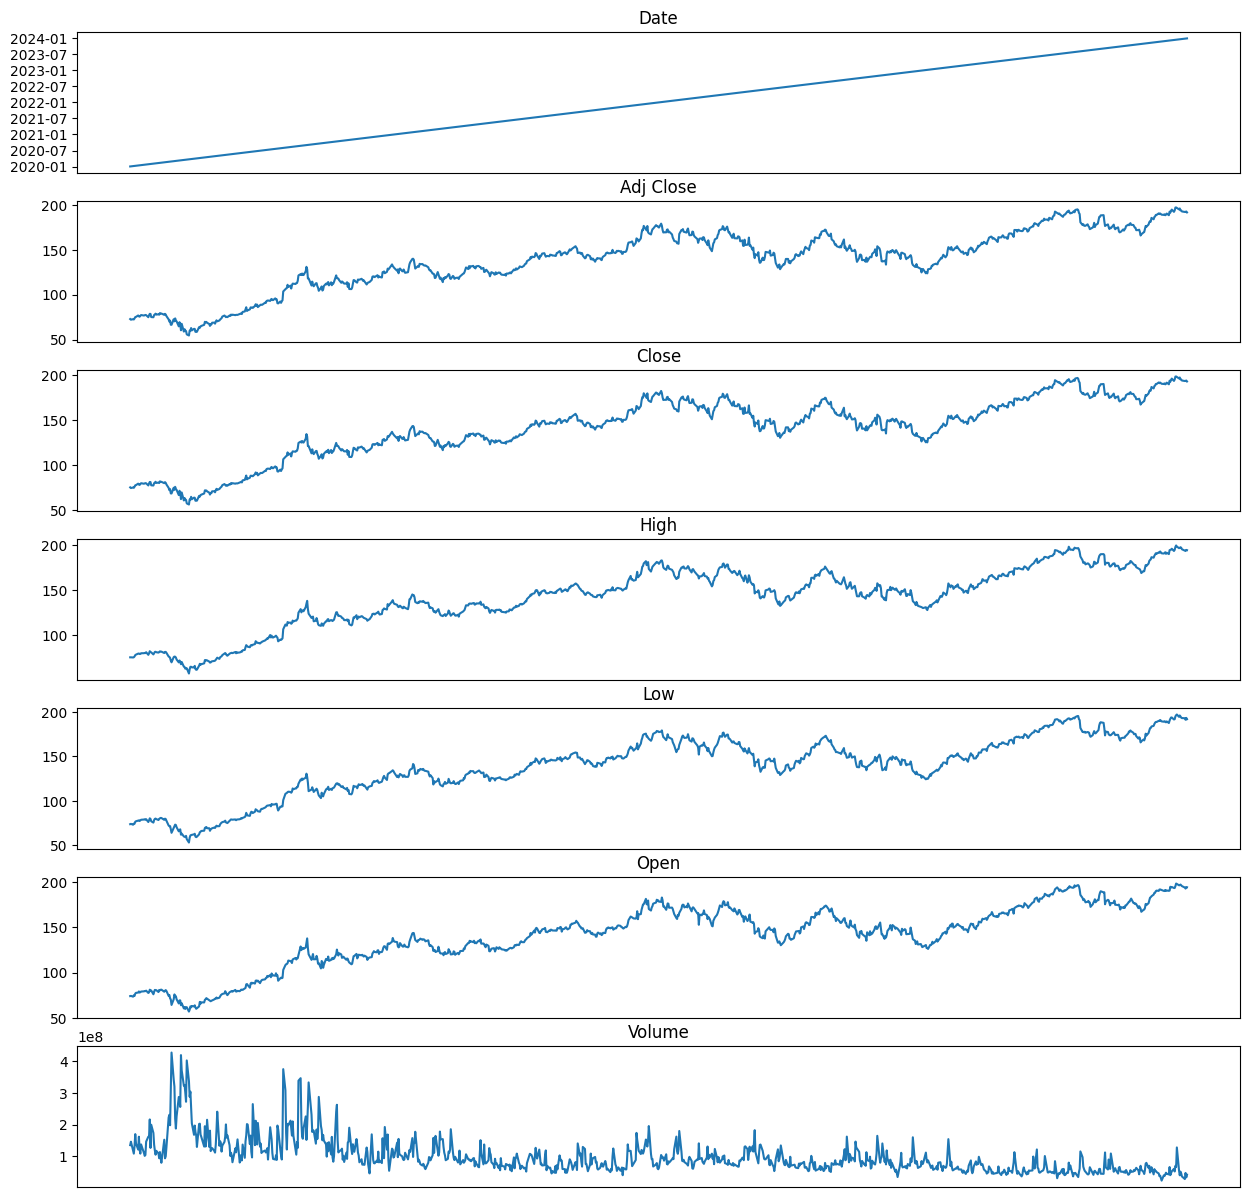

In [60]:
plt.rcParams['figure.figsize'] = [15, 15]
figure, axes = plt.subplots(7)
for ax, col in zip(axes,data.columns):
  ax.plot(data[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)


In [61]:
import pandas as pd

# Assuming 'df' is your DataFrame
correlations = df.corr()['Close']  # Replace 'Close' with your target variable column name
correlations = correlations.abs().sort_values(ascending=False)

# Print or display the correlations
print(correlations)

Close        1.000000
Adj Close    0.999861
Low          0.999073
High         0.999008
Open         0.997894
SMA          0.896091
Date         0.869131
SM2A         0.752951
SMA2         0.752951
Volume       0.646689
Name: Close, dtype: float64


In [62]:
data.drop(['Date', 'Adj Close'], axis=1,inplace=True)


In [63]:
data.drop(['SMA'],axis=1,inplace=True)

In [64]:
data.head(3)

,Close,High,Low,Open,Volume,SM2A,SMA2
Date,,,,,,,
2020-01-02,75.087502,75.150002,73.797501,74.059998,135480400,NaN,NaN
2020-01-03,74.357498,75.144997,74.125000,74.287498,146322800,NaN,NaN
2020-01-06,74.949997,74.989998,73.187500,73.447502,118387200,NaN,NaN


In [65]:
data.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0
SM2A,199
SMA2,199


In [66]:
df.shape

(1006, 7)

In [67]:
df.describe()


,Close,High,Low,Open,Volume,SM2A,SMA2
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03,807.000000,807.000000
mean,140.808131,142.321389,139.143536,140.675507,9.895211e+07,143.162010,143.162010
std,33.313857,33.430571,33.179199,33.310018,5.439653e+07,21.442864,21.442864
min,56.092499,57.125000,53.152500,57.020000,2.404830e+07,88.593500,88.593500
25%,123.592501,125.030003,122.157499,123.682503,6.407675e+07,128.905350,128.905350
50%,145.860001,147.264999,144.120003,145.540001,8.467540e+07,150.279050,150.279050
75%,166.214996,168.147503,164.815002,166.302498,1.155069e+08,158.772600,158.772600
max,198.110001,199.619995,197.000000,198.020004,4.265100e+08,179.487900,179.487900


In [68]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]   #Features
y = df['Close']  #Target variables

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [70]:
X_train.shape

(704, 4)

In [71]:
y_train.shape

(704,)

In [72]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Linear Regression

In [74]:
model1 = LinearRegression()

In [75]:
model1.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred1 = model1.predict(X_test)

In [29]:
y_pred1

array([125.82039682, 146.05513859, 117.99340883, 196.53376273,
       175.41850438, 124.42233586, 176.90083758, 125.6420423 ,
       165.21546574, 175.88876322,  93.72238692, 141.47782964,
       151.15617253, 127.1460353 , 144.76032554, 135.71552117,
       175.5823028 , 127.98890759, 184.06411097,  58.63682019,
       141.93931724, 156.82088576, 126.93167944, 127.3623835 ,
        66.63290285, 189.9392678 , 188.82021226, 195.01448503,
       148.3052667 , 136.78200427, 127.89170571, 138.86667349,
       124.91913771, 110.72178502, 172.36299586,  76.79150651,
       145.13993624, 183.23972047, 173.1414073 , 156.31728785,
       138.70811544, 173.05926956, 160.50750501, 118.9465101 ,
       193.13699345, 169.4717684 , 151.12202088, 166.38599168,
       197.32442994, 187.8895108 , 149.41067431, 121.1560491 ,
       160.14662182, 186.81279677, 144.5014637 , 160.80655319,
       145.66224385, 141.7494016 , 171.6881122 , 148.93236165,
       125.26511888, 121.56220215, 133.96048821, 152.55

In [76]:
accuracy1 = accuracy_score(y_test > y_pred1, y_test > y_pred1.round())
accuracy1

0.9006622516556292

In [80]:
temp_rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
rmse1 = "{:.20f}".format(temp_rmse1)
rmse1

'0.98111262550105604596'

In [81]:
mse1 = mean_squared_error(y_test, y_pred1)
mse1

0.9625819839175755

In [82]:
temp_mae1 = mean_absolute_error(y_test, y_pred1)
mae1 = "{:.20f}".format(temp_mae1)
mae1

'0.73900854083547584672'

In [84]:
temp_mape1 = mean_absolute_percentage_error(y_test, y_pred1)
mape1 = "{:.20f}".format(temp_mape1)
mape1

'0.00536737053068486215'

In [85]:
R2_score1 = r2_score(y_test > y_pred1, y_test > y_pred1.round())
print(R2_score1)

0.6025792867482563


In [86]:
#Random Forest

In [87]:
model2 = RandomForestRegressor()

In [88]:
model2.fit(X_train, y_train)


RandomForestRegressor()

In [89]:
y_pred2 = model2.predict(X_test)

In [90]:
y_pred2

array([126.34449874, 145.98680038, 116.91837645, 196.01639922,
       175.10459838, 125.06459931, 175.48869949, 125.3479245 ,
       162.99710191, 175.57100236,  93.16315025, 142.26810044,
       150.81410109, 127.21302316, 143.74989929, 135.4097998 ,
       175.18169693, 130.01189996, 184.09800021,  61.30825035,
       142.98369949, 157.51169983, 126.17537437, 128.22970094,
        65.66792423, 189.29520033, 189.60120267, 194.05590346,
       148.47330033, 135.81430082, 127.43532311, 139.73350128,
       124.90907448, 109.37334944, 173.04170289,  77.39025001,
       144.09290374, 182.31260178, 174.47539992, 157.17499986,
       137.87760131, 174.27249922, 159.61849763, 118.87709868,
       193.03040358, 168.67919952, 151.21500059, 166.44839859,
       195.67180098, 189.22979948, 149.79790236, 121.88099984,
       160.53040147, 187.31359711, 144.81509826, 162.58539918,
       145.8956006 , 141.61570115, 169.73940003, 149.22280092,
       125.41515022, 121.7123987 , 134.34900069, 150.50

In [91]:
accuracy2 = accuracy_score(y_test > y_pred2, y_test > y_pred2.round())
accuracy2

0.9172185430463576

In [92]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
rmse2

1.3336730009842774

In [93]:
mse2 = mean_squared_error(y_test, y_pred2)
mse2

1.7786836735544083

In [112]:
mae2 = mean_absolute_error(y_test, y_pred2)
mae2

0.9859010940735135

In [96]:
mape2 = mean_absolute_percentage_error(y_test, y_pred2)
mape2

0.007355994866600782

In [97]:
R2_score2 = r2_score(y_test > y_pred2, y_test > y_pred2.round())
print(R2_score2)

0.6687434187434188


R2_Score is very less when we use Random Forest model.

So we can use another model.

LSTM

In [98]:
# Reshape the input data for LSTM
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1


In [99]:
# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])

In [100]:
model3 = Sequential()
model3.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model3.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [101]:
model3.compile(loss='mean_squared_error', optimizer='adam')

In [102]:
model3.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [103]:
# Make predictions on the test set
y_pred3 = model3.predict(X_test_reshaped).flatten()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [104]:
y_pred3

array([137.06009, 132.46048, 142.61676, 134.0237 , 135.04022, 139.12802,
       135.84708, 139.03223, 132.48166, 141.04102, 129.7377 , 141.83353,
       136.10658, 135.60979, 139.55585, 136.82217, 149.7731 , 139.70651,
       145.37009, 139.5318 , 135.82283, 137.0209 , 139.06357, 139.23125,
       140.17413, 136.38976, 125.60496, 138.0166 , 135.59015, 134.88852,
       136.7827 , 138.96263, 144.95715, 139.70319, 138.78922, 145.18704,
       133.64505, 133.94472, 136.9815 , 137.9161 , 136.03009, 134.01562,
       137.35294, 141.01149, 135.54002, 133.08456, 137.98239, 133.7974 ,
       134.66086, 137.36874, 135.46672, 136.02692, 135.38947, 135.51237,
       135.60316, 129.82481, 142.7264 , 137.31093, 136.9914 , 137.81209,
       138.13362, 140.24472, 139.92873, 148.1684 , 140.87053, 134.78322,
       136.17363, 134.95627, 139.14427, 137.47949, 139.7952 , 134.83197,
       136.55858, 129.02316, 141.3568 , 132.97017, 132.6171 , 140.6282 ,
       132.64294, 138.28427, 137.37645, 142.07782, 

In [105]:
#Matching the lengths of test and predict
y_test_trimmed = y_test[n_steps-1:len(y_pred2)+n_steps-1]

In [106]:
accuracy3 = accuracy_score(y_test_trimmed > y_pred3, y_test_trimmed > y_pred3.round())
print(accuracy3)

0.9965870307167235


In [107]:

rmse3 = np.sqrt(mean_squared_error(y_test[n_steps-1:], y_pred3))
rmse3

31.255756374144127

In [108]:
mse3 = mean_squared_error(y_test[n_steps-1:], y_pred3)
mse3

976.9223065198512

In [109]:
mape3 = mean_absolute_percentage_error(y_test[n_steps-1:], y_pred3)
mape3

0.19731459086277744

In [111]:
mae3 = mean_absolute_error(y_test[n_steps-1:], y_pred3)
mae3


25.109194952926824

In [ ]:
#Matching the lengths of test and predict for R2_score calculation
y_test_trimmed = y_test[n_steps-1:len(y_pred3)+n_steps-1]
R2_score3 = r2_score(y_test_trimmed > y_pred3, y_test_trimmed > y_pred3.round())
print(R2_score3)

0.8544494720965309


ANN

In [ ]:
# Create an ANN model
model4 = Sequential()
model4.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model4.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model4.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
# Make predictions on the test set
y_pred4 = model4.predict(X_test_scaled).flatten()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
accuracy4 = accuracy_score(y_test > y_pred4, y_test > y_pred4.round())
accuracy4

0.9602649006622517

In [ ]:
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
rmse4

2.5435341242757006

In [ ]:
mse4 = mean_squared_error(y_test, y_pred4)
mse4

6.469565841354956

In [ ]:
mae4 = mean_absolute_error(y_test, y_pred4)
mae4

1.9372517047400797

In [ ]:
mape4 = mean_absolute_percentage_error(y_test, y_pred4)
mape4

0.015620743732292818

In [ ]:
R2_score4 = r2_score(y_test > y_pred4, y_test > y_pred4.round())
print(R2_score4)

0.833585893373743


SVM

In [ ]:
model5 = SVR()

In [ ]:
model5.fit(X_train, y_train)

SVR()

In [ ]:
y_pred5 = model5.predict(X_test)

In [ ]:
y_pred5

array([146.46433875, 158.51614362, 123.82192232, 160.61680182,
       154.45433358, 139.93764553, 155.81285927, 133.36633829,
       132.20561461, 148.5619114 , 127.3621037 , 144.31295221,
       151.09545304, 150.19285263, 127.23903023, 155.4317527 ,
       131.88476952, 117.82664039, 128.65510824, 122.92200709,
       150.62335066, 133.61967836, 141.67943325, 142.19612947,
       112.92785097, 156.78708106, 158.54943161, 158.92659088,
       160.55353283, 146.02207704, 148.74565117, 141.28457289,
       150.13765316, 114.35929453, 142.86903521, 112.90577711,
       136.30723346, 156.83336695, 153.15864093, 147.56556419,
       126.69812474, 158.33783509, 148.14911697, 114.8113569 ,
       162.56700935, 159.63110899, 155.96787769, 147.69589335,
       150.53736753, 159.99593757, 142.13518353, 142.75526444,
       125.90986951, 154.75355559, 148.86115984, 158.87829173,
       156.42460209, 145.71681666, 137.2168592 , 123.7631422 ,
       124.13653222, 115.62425538, 141.29829389, 140.76

In [ ]:
rmse5 = np.sqrt(mean_squared_error(y_test,y_pred5))
rmse5

25.015594860004715

In [ ]:
mse5 = mean_squared_error(y_test,y_pred5)
mse5

625.7799861998943

In [ ]:
mae5 = mean_absolute_error(y_test, y_pred5)
mae5

20.409581448914935

In [ ]:
mape5 = mean_absolute_percentage_error(y_test, y_pred5)
mape5

0.15965304955665416

In [ ]:
accuracy5 = accuracy_score(y_test >y_pred2, y_test > y_pred5.round())
accuracy5

0.5927152317880795

In [ ]:
R2_score5 = r2_score(y_test > y_pred5, y_test > y_pred5.round())
print(R2_score5)

1.0


Decision Tree(CART algorithm)

In [ ]:
model6 = DecisionTreeRegressor()

In [ ]:
# Train the model
model6.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Make predictions on the test set
y_pred6 = model6.predict(X_test)

In [ ]:
y_pred6

array([126.2699966 , 145.8600006 , 117.5100021 , 194.6799927 ,
       174.7200012 , 123.        , 174.7899933 , 125.5699997 ,
       163.6399994 , 175.4600067 ,  93.17250061, 141.5       ,
       150.7200012 , 127.1299973 , 145.4299927 , 135.4299927 ,
       175.8399963 , 127.8499985 , 182.9100037 ,  60.35250092,
       143.9600067 , 159.5899963 , 125.1200027 , 128.8000031 ,
        63.70249939, 189.6900024 , 189.6900024 , 193.6000061 ,
       148.9600067 , 135.9400024 , 127.4499969 , 140.3600006 ,
       124.2799988 , 108.8600006 , 171.6600037 ,  77.40750122,
       145.4900055 , 182.4100037 , 175.8399963 , 156.8099976 ,
       139.0700073 , 175.6399994 , 159.7799988 , 118.6399994 ,
       193.5800018 , 170.2899933 , 151.        , 166.4700012 ,
       194.6799927 , 189.25      , 148.7100067 , 123.0800018 ,
       159.3000031 , 187.8699951 , 144.8699951 , 161.5099945 ,
       145.8600006 , 142.        , 168.6399994 , 150.1799927 ,
       127.7900009 , 123.3899994 , 133.7200012 , 150.03

In [ ]:
rmse6 = np.sqrt(mean_squared_error(y_test, y_pred6))
rmse6

1.7166843921461112

In [ ]:
mse6 = mean_squared_error(y_test, y_pred6)
mse6

2.947005302238064

In [ ]:
mae6 = mean_absolute_error(y_test, y_pred6)
mae6

1.2790068043046354

In [ ]:
mape6 = mean_absolute_percentage_error(y_test, y_pred6)
mape6

0.009532727999752615

In [ ]:
accuracy6 = accuracy_score(y_test > y_pred6, y_test > y_pred6.round())
accuracy6

0.9139072847682119

In [ ]:
R2_score6 = r2_score(y_test > y_pred6, y_test > y_pred6.round())
print(R2_score6)

0.6555687151818221


In [ ]:
model7 = KNeighborsRegressor()

In [ ]:
model7.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred7 = model7.predict(X_test)

In [ ]:
y_pred7

array([157.93599856, 164.20400086, 100.75849915, 185.51199646,
       174.37600098, 137.27799988, 162.16800232, 118.14900055,
       143.19400024, 149.46199644, 121.87949981, 146.98199768,
       160.7160034 , 139.24799958, 121.87949981, 161.81200256,
       148.56000062, 112.33749846, 158.06199798,  86.40149918,
       153.47000122, 126.28900299, 135.06850128, 144.21800232,
       116.6144989 , 155.69600218, 161.33399964, 172.88399964,
       180.3159973 , 132.26549835, 139.688002  , 122.68549957,
       139.24799958,  64.86200027, 151.51400146, 116.6144989 ,
       148.11600034, 155.69600218, 149.46000062, 142.9439972 ,
       126.28949739, 176.7080017 , 143.97399596, 132.12900085,
       193.04400328, 174.79599914, 158.72400056, 149.28399962,
       156.42000122, 181.05599974, 144.21800232, 147.78400268,
       115.71950073, 160.14799802, 134.45800018, 174.62399904,
       169.31800232, 119.18649901, 133.53599854, 121.12200012,
        95.28900148, 131.86399688, 122.68549957, 158.47

In [ ]:
rmse7 = np.sqrt(mean_squared_error(y_test, y_pred7))
rmse7

26.73689566104558

In [ ]:
mse7 = mean_squared_error(y_test, y_pred7)
mse7

714.8615895896379

In [ ]:
mae7 = mean_absolute_error(y_test, y_pred7)
mae7

21.6445032458808

In [ ]:
mape7 = mean_absolute_percentage_error(y_test, y_pred7)
mape7

0.1661871760069884

In [ ]:
accuracy7 = accuracy_score(y_test > y_pred7, y_test > y_pred7.round())
accuracy7

0.9933774834437086

In [ ]:
R2_score7 = r2_score(y_test > y_pred7, y_test > y_pred7.round())
print(R2_score7)

0.9729874776386405


Gradient Boost

In [ ]:
model8 = xgb.XGBRegressor()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model8.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions on the test set
pred8 = model8.predict(X_test)

In [ ]:
rmse8 = np.sqrt(mean_squared_error(y_test, pred8))
rmse8

1.5659055983433174

In [ ]:
mae8 = mean_absolute_error(y_test, pred8)
mae8

1.1283633937367532

In [ ]:
mse8 = mean_squared_error(y_test, pred8)
mse8

2.4520603429229433

In [ ]:
mape8 = mean_absolute_percentage_error(y_test, pred8)
mape8

0.009078910235668643

In [ ]:
accuracy8 = accuracy_score(y_test > pred8, y_test > pred8.round())
accuracy8

0.9356435643564357

In [ ]:
R2_score8 = r2_score(y_test > pred8, y_test > pred8.round())
print(R2_score8)

0.741331757289204


Xtremum Gradiant Boost

In [ ]:
model9 = xgb.XGBRegressor()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the model
model9.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred9 = model9.predict(X_test)

In [ ]:
rmse9 = np.sqrt(mean_squared_error(y_test, pred9))
rmse9

1.5659055983433174

In [ ]:
mae9 = mean_absolute_error(y_test, pred9)
mae9

1.1283633937367532

In [ ]:
mape9 = mean_absolute_percentage_error(y_test, pred9)
mape9

0.009078910235668643

In [ ]:
accuracy9 = accuracy_score(y_test > pred9, y_test > pred9.round())
accuracy9

0.9356435643564357

In [ ]:
mse9 = mean_squared_error(y_test, pred9)
mse9

2.4520603429229433

In [ ]:
R2_score9 = r2_score(y_test > pred9, y_test > pred9.round())
print(R2_score9)

0.741331757289204


AdaBoostRegressor

In [ ]:
model10 = AdaBoostRegressor()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model10.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
pred10 = model10.predict(X_test)

In [ ]:
rmse10 = np.sqrt(mean_squared_error(y_test, pred10))
rmse10

2.192837832803606

In [ ]:
mae10 = mean_absolute_error(y_test, pred10)
mae10

1.643754287374649

In [ ]:
mape10 = mean_absolute_percentage_error(y_test, pred10)
mape10

0.01354961574342719

In [ ]:
accuracy10 = accuracy_score(y_test > pred10, y_test > pred10.round())
accuracy10

0.9257425742574258

In [ ]:
mse10 = mean_squared_error(y_test, pred10)
mse10

4.808537760974816

In [ ]:
R2_score10 = r2_score(y_test > pred10, y_test > pred10.round())
print(R2_score10)

0.6881753627662859


Comparing all evaluation Metrics:


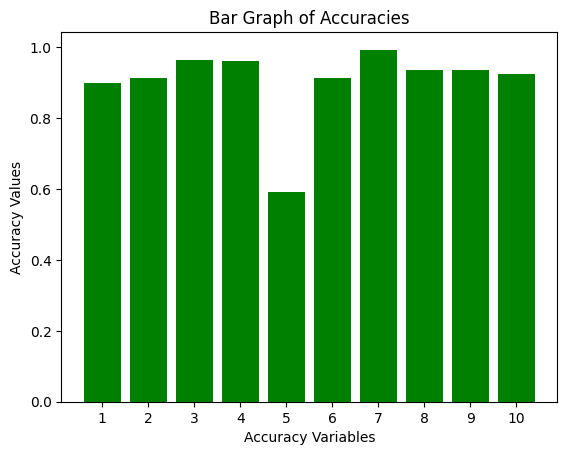

In [ ]:
import matplotlib.pyplot as plt

accuracies = [accuracy1, accuracy2,accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8, accuracy9, accuracy10]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']

# Plotting the bar graph
plt.bar(labels, accuracies, color='green')
plt.xlabel('Accuracy Variables')
plt.ylabel('Accuracy Values')
plt.title('Bar Graph of Accuracies')
plt.show()

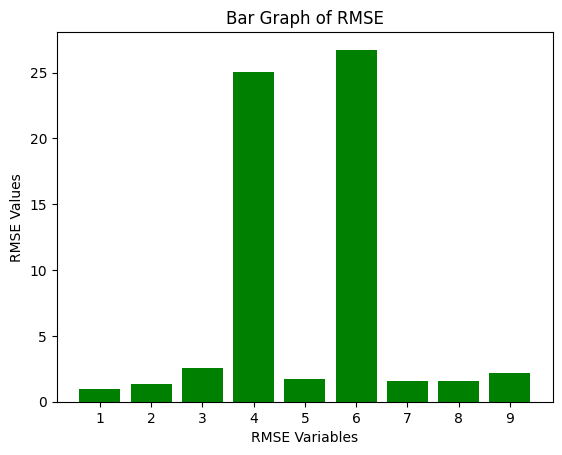

In [ ]:
import matplotlib.pyplot as plt

rmse = [float(rmse1), rmse2,rmse4, rmse5, rmse6, rmse7, rmse8, rmse9, rmse10]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plotting the bar graph
plt.bar(labels, rmse, color='green')
plt.xlabel('RMSE Variables')
plt.ylabel('RMSE Values')
plt.title('Bar Graph of RMSE')
plt.show()

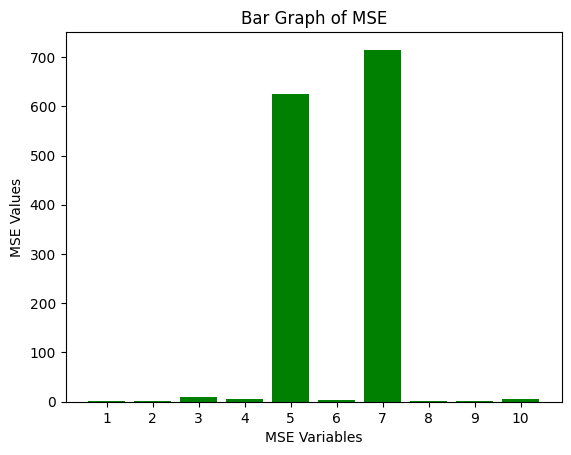

In [ ]:
import matplotlib.pyplot as plt
mse = [float(mse1), mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9, mse10]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, mse, color='green')
plt.xlabel('MSE Variables')
plt.ylabel('MSE Values')
plt.title('Bar Graph of MSE')
plt.show()

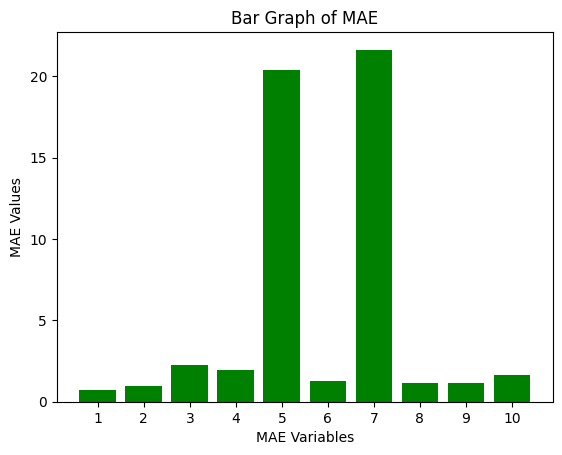

In [ ]:
import matplotlib.pyplot as plt

mae = [float(mae1), mae2, mae3,mae4, mae5, mae6, mae7, mae8, mae9, mae10]

labels = ['1', '2','3', '4','5','6','7','8','9','10']

# Plotting the bar graph
plt.bar(labels, mae, color='green')
plt.xlabel('MAE Variables')
plt.ylabel('MAE Values')
plt.title('Bar Graph of MAE')
plt.show()

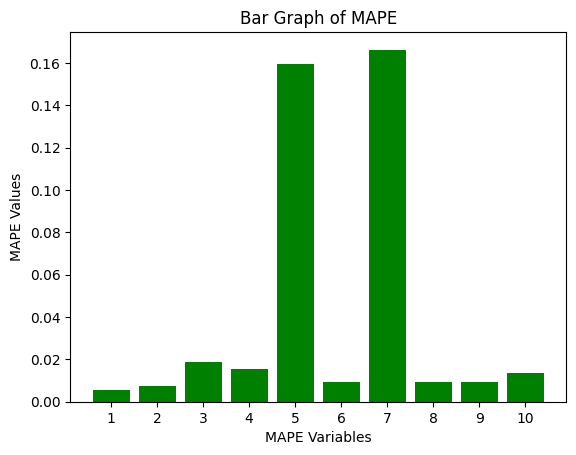

In [ ]:
import matplotlib.pyplot as plt


mape = [float(mape1), mape2, mape3,mape4, mape5, mape6, mape7, mape8, mape9, mape10]
labels = ['1', '2','3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, mape, color='green')
plt.xlabel('MAPE Variables')
plt.ylabel('MAPE Values')
plt.title('Bar Graph of MAPE')
plt.show()

LSTM

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

,Close
0,75.087502
1,74.357498
2,74.949997
3,74.597504
4,75.797501
...,...
1001,193.600006
1002,193.050003
1003,193.149994
1004,193.580002


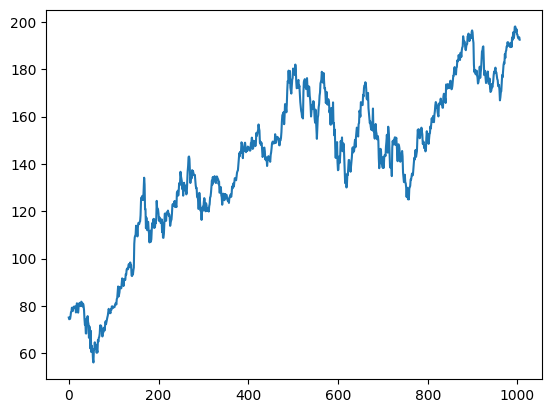

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

,Close
0,75.087502
1,74.357498
2,74.949997
3,74.597504
4,75.797501
...,...
1001,193.600006
1002,193.050003
1003,193.149994
1004,193.580002


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.13375114]
 [0.1286109 ]
 [0.13278292]
 ...
 [0.96507468]
 [0.96810253]
 [0.96070906]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(653, 353)

In [ ]:
train_data

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       [0.13030088],
       [0.13875052],
       [0.15008715],
       [0.15131936],
       [0.16299047],
       [0.15545619],
       [0.15309733],
       [0.15996267],
       [0.16610632],
       [0.16230396],
       [0.16429316],
       [0.16698649],
       [0.16536695],
       [0.14889013],
       [0.16427554],
       [0.17598183],
       [0.17515447],
       [0.14987592],
       [0.14837961],
       [0.16631755],
       [0.17089446],
       [0.17751333],
       [0.16839474],
       [0.17107045],
       [0.16765538],
       [0.18101645],
       [0.17691481],
       [0.17705567],
       [0.16658159],
       [0.17471438],
       [0.16887002],
       [0.15610751],
       [0.12993116],
       [0.11215165],
       [0.12019645],
       [0.08652102],
       [0.08623935],
       [0.13104019],
       [0.11433452],
       [0.13795834],
       [0.12067178],
       [0.11382401],
       [0.07358251],
       [0.10732832],
       [0.089

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:

print(X_train.shape), print(y_train.shape)

(552, 100)
(552,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(252, 100)
(252,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model3=Sequential()
model3.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model3.add(LSTM(50,return_sequences=True))
model3.add(LSTM(50))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - loss: 0.1922 - val_loss: 0.0039
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - loss: 0.0107 - val_loss: 0.0355
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - loss: 0.0067 - val_loss: 0.0060
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - loss: 0.0059 - val_loss: 0.0214
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 0.0046 - val_loss: 0.0070
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - loss: 0.0040 - val_loss: 0.0111
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0037 - val_loss: 0.0072
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - loss: 0.0031 - val_loss: 0.0080
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0028 - val_loss: 0.0039
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - loss: 0.0028 - val_loss: 0.0049
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model3.predict(X_train)
test_predict=model3.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train,train_predict))
rmse

137.912810250272

In [ ]:
### Test Data RMSE
mse3 = math.sqrt(mean_squared_error(ytest,test_predict))
mse3

169.82009440811083

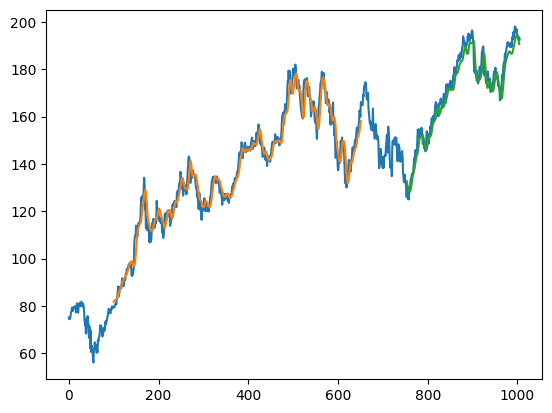

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

353

In [ ]:
x_input=test_data[253:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8597356104373136,
 0.858186497143666,
 0.8569189920989132,
 0.8686782004964576,
 0.8545249463253796,
 0.8483286001798506,
 0.8302321876457296,
 0.8336825053440443,
 0.8431883111968402,
 0.8529758330317317,
 0.8803668190028159,
 0.8469907200061745,
 0.8626929797376998,
 0.8738183817462674,
 0.9014909759662465,
 0.9263470588768873,
 0.9278961721705351,
 0.939092057041227,
 0.940781920592722,
 0.8929709598802461,
 0.8552995036763419,
 0.8596651282793281,
 0.8679740189785575,
 0.8464273964793222,
 0.8317109258104537,
 0.8424842374121405,
 0.8373439484291302,
 0.858186497143666,
 0.865932064316043,
 0.8407238909985214,
 0.829739239247801,
 0.8357948351354826,
 0.8448782824815358,
 0.8158678080878806,
 0.8050943894571317,
 0.8069252180287366,
 0.8105867688470229,
 0.8284718412321105,
 0.818965927646114,
 0.8278381425763345,
 0.8366398746444307,
 0.8548066623074752,
 0.8653687407891907,
 0.8611438664440519,
 0.8710722462699915,
 0.8774799325645538,
 0.8643829510223954,
 0.8634675363845236,

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model3.predict(x_input, verbose=0)
        print()
        print("{} day output {}".format(i,yhat))
        print()
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model3.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


lst_output

0 day input [0.8581865  0.85691899 0.8686782  0.85452495 0.8483286  0.83023219
 0.83368251 0.84318831 0.85297583 0.88036682 0.84699072 0.86269298
 0.87381838 0.90149098 0.92634706 0.92789617 0.93909206 0.94078192
 0.89297096 0.8552995  0.85966513 0.86797402 0.8464274  0.83171093
 0.84248424 0.83734395 0.8581865  0.86593206 0.84072389 0.82973924
 0.83579484 0.84487828 0.81586781 0.80509439 0.80692522 0.81058677
 0.82847184 0.81896593 0.82783814 0.83663987 0.85480666 0.86536874
 0.86114387 0.87107225 0.87747993 0.86438295 0.86346754 0.85241251
 0.84318831 0.84051266 0.82234587 0.8231908  0.82628903 0.80981221
 0.78016793 0.78953299 0.8041086  0.80748854 0.83002095 0.85536999
 0.84889182 0.8670586  0.88529587 0.8928301  0.88945027 0.91754533
 0.90627917 0.92486843 0.92888196 0.9408524  0.94071155 0.95310435
 0.94740084 0.95211856 0.94268312 0.94141562 0.94571087 0.93845825
 0.94254227 0.95162572 0.93888072 0.96697588 0.95923042 0.97296111
 0.98310072 0.96528591 0.97605933 0.99894384 1.   

[[0.938419759273529],
 [0.9338724613189697],
 [0.928647518157959],
 [0.9232131242752075],
 [0.9178882241249084],
 [0.912843644618988],
 [0.9081459641456604],
 [0.9038005471229553],
 [0.8997834324836731],
 [0.8960574865341187],
 [0.8925800323486328],
 [0.8893090486526489],
 [0.8862032294273376],
 [0.8832235932350159],
 [0.8803350329399109],
 [0.8775067925453186],
 [0.874712347984314],
 [0.8719310164451599],
 [0.8691467642784119],
 [0.8663487434387207],
 [0.8635305762290955],
 [0.8606904745101929],
 [0.8578292727470398],
 [0.8549513220787048],
 [0.8520621061325073],
 [0.8491696119308472],
 [0.8462810516357422],
 [0.84340500831604],
 [0.840549647808075],
 [0.8377218842506409]]

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1006

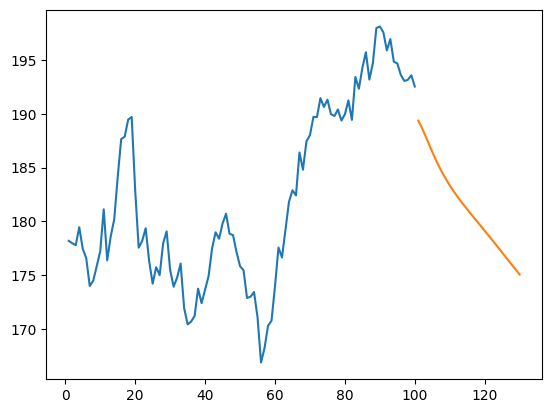

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[906:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

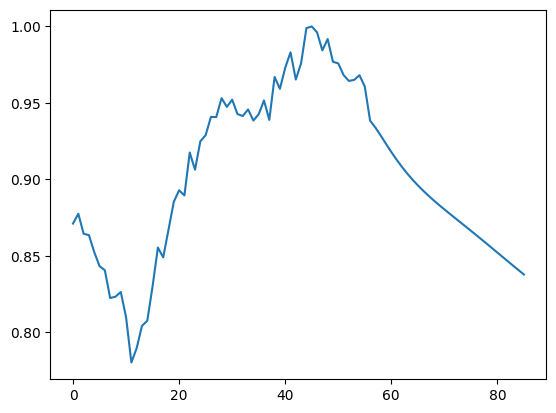

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[950:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

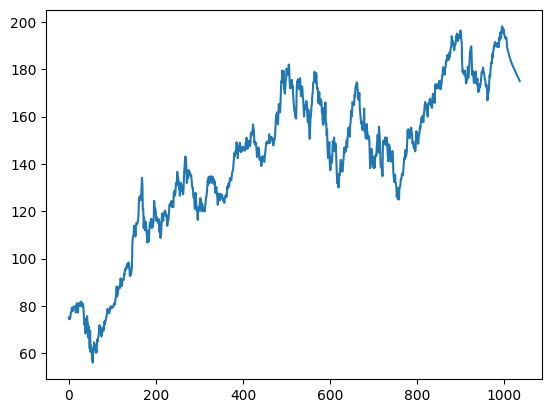

In [ ]:
plt.plot(df3)